In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
data=pd.read_csv("data_2.csv")
data=data.drop(columns=['ID','Unnamed: 0'])
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_view_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


SAMPLE DATA 

In [4]:
sale_price=data['Sale_Price'].head(30)
flat_area=data['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'Sale_price': sale_price,'flat_area':flat_area})


sample_data

,Sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


Text(0, 0.5, 'sale_price')

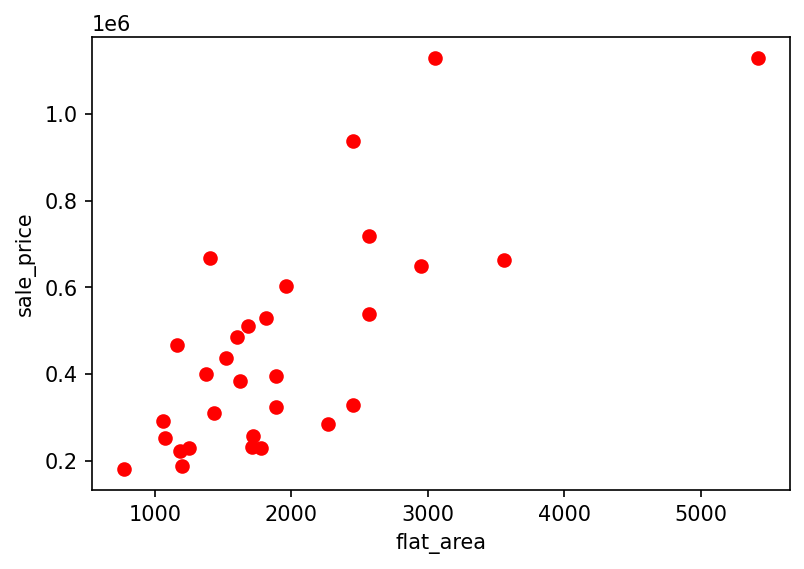

In [5]:
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area,sample_data.Sale_price,color='red')
plt.xlabel("flat_area")
plt.ylabel("sale_price")

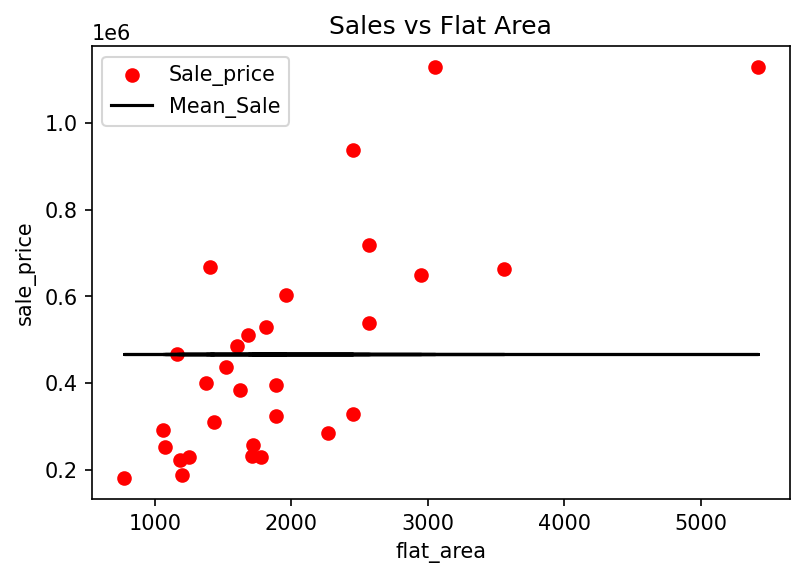

In [6]:
sample_data['Mean_sale']=sample_data.Sale_price.mean()
plt.figure(dpi=150)
plt.scatter(sample_data.flat_area,sample_data.Sale_price,color='red',label='Sale_price')
plt.plot(sample_data.flat_area,sample_data.Mean_sale,color='black',label='Mean_Sale')
plt.xlabel("flat_area")
plt.ylabel("sale_price")
plt.title("Sales vs Flat Area")
plt.legend()
plt.show()

Cost Function Curve

Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

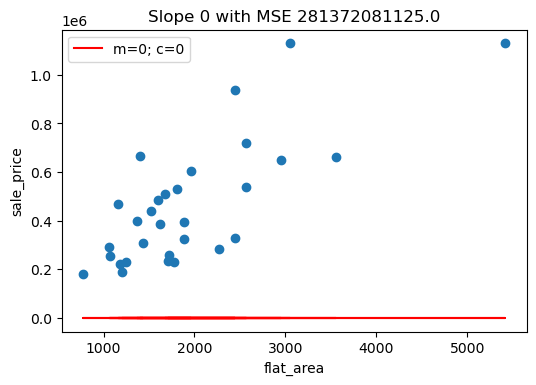

In [7]:

from sklearn.metrics import mean_squared_error as mse
c=0 # intercept
m=0  #slope
line=[]
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m+c)

plt.figure(dpi=100)
plt.scatter(sample_data.flat_area,sample_data.Sale_price)
plt.plot (sample_data.flat_area,line,label='m=0; c=0',color='red')
plt.xlabel('flat_area')
plt.ylabel("sale_price")
plt.legend()
MSE=mse(sample_data.Sale_price,line)
plt.title('Slope '+str(m)+" with MSE "+str(MSE))


 

Text(0.5, 1.0, 'Slope 50 with MSE 184728400708.33334')

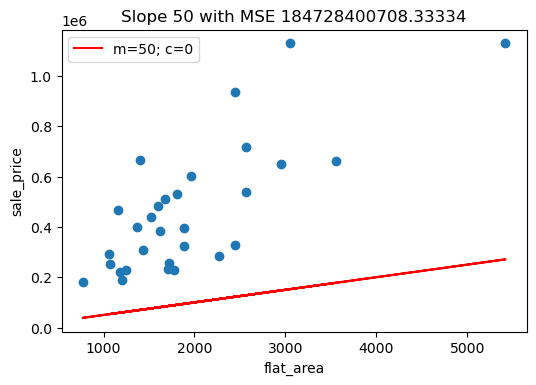

In [8]:

# Cost Function with slope 50

c=0 # intercept
m=50  #slope
line=[]
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m+c)

plt.figure(dpi=100)
plt.scatter(sample_data.flat_area,sample_data.Sale_price)
plt.plot (sample_data.flat_area,line,label='m=50; c=0',color='red')
plt.xlabel('flat_area')
plt.ylabel("sale_price")
plt.legend()
MSE=mse(sample_data.Sale_price,line)
plt.title('Slope '+str(m)+" with MSE "+str(MSE))


In [9]:
#using function

def slope_error(slope,intercept,sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        tmp=sample_data[i]*slope+intercept
        sale.append(tmp)
    MSE=mse(sample_data.Sale_price,sale)
    return MSE
    
    


In [12]:
slope=[i/10 for i in range(0,5000)]  #range for slope value
Cost=[]              #it stores values return by function slope error

for i in slope:
    cost=slope_error(slope=i,intercept=150,sample_data=sample_data)
    Cost.append(cost)

KeyError: 0

In [ ]:
#arranging in a Dataframe

cost_table=pd.DataFrame({
    'Slope':slope,
    'Cost':cost
})

NameError: name 'slope' is not defined